# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [72]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [73]:
# Read the Mapbox API key

load_dotenv()
mapbox_token = os.getenv("MAPBOX")

## Load Data

In [74]:
# Read the census data into a Pandas DataFrame

file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [99]:
# Calculate the mean number of housing units per year (hint: use groupby)

housing_units= sfo_data.groupby('year').mean()
housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


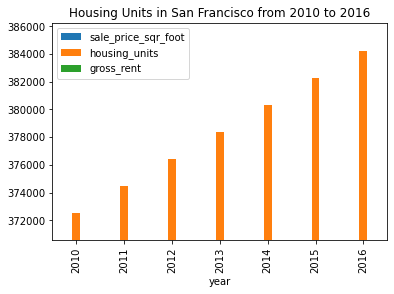

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [102]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

#min = housing_units.min()['housing_units']
#max = housing_units.max()['housing_units']
housing_units.plot.bar(ylim =(min-2000, max+2000), title="Housing Units in San Francisco from 2010 to 2016"
)

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

plt.show()
plt.close(housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [77]:
# Calculate the average gross rent and average sale price per square foot

average_rent_sqr_foot = pd.DataFrame(sfo_data["gross_rent"].groupby([sfo_data.index]).mean())
average_rent_sqr_foot

,gross_rent
year,
2010,1239
2011,1530
2012,2324
2013,2971
2014,3528
2015,3739
2016,4390


<AxesSubplot:title={'center':'Average Goss Rent in San Francisco per Year'}, xlabel='year'>

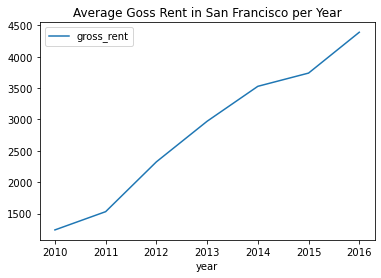

In [78]:
# Plot the Average Gross Rent per Year as a Line Chart

average_rent_sqr_foot.plot.line(title="Average Goss Rent in San Francisco per Year")

### Average Sales Price per Year

<AxesSubplot:title={'center':'Average Sales Price per Square Foot in San Francisco'}, xlabel='year'>

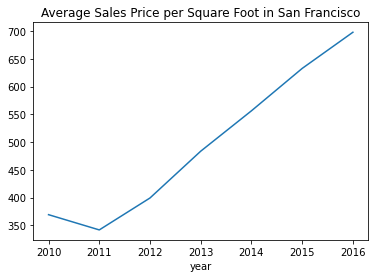

In [79]:
# Plot the Average Sales Price per Year as a line chart

average_price_per_sqr_foot = sfo_data["sale_price_sqr_foot"].groupby([sfo_data.index]).mean()
average_price_per_sqr_foot.plot(title="Average Sales Price per Square Foot in San Francisco")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [80]:
# Group by year and neighborhood and then create a new dataframe of the mean values

sfo_data_new = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_sales = sfo_data_new["sale_price_sqr_foot"]
sfo_sales_df = pd.DataFrame(sfo_sales).reset_index()
sfo_sales_df.head(10)

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623
5,2010,Central Sunset,418.172493
6,2010,Corona Heights,369.359338
7,2010,Cow Hollow,569.379968
8,2010,Croker Amazon,165.645730
9,2010,Diamond Heights,456.930822


In [81]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sfo_data_new.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="San Francisco Sales per Square foot per Year",
    groupby="neighborhood",
)   
    


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [82]:
# Getting the data from the top 10 expensive neighborhoods

top_10_most_expensive = sfo_data.sort_values(by='sale_price_sqr_foot', ascending=False).reset_index()
top_10_most_expensive.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2015,Union Square District,2258.702832,382295,3739
1,2016,Presidio Heights,1465.968586,384242,4390
2,2016,Merced Heights,1416.666667,384242,4390
3,2013,Union Square District,1290.472107,378401,2971
4,2014,Miraloma Park,1267.766203,380348,3528
5,2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
6,2016,Outer Richmond,1196.645437,384242,4390
7,2015,Marina,1132.837361,382295,3739
8,2014,South of Market,1119.838877,380348,3528
9,2015,Corona Heights,1100.791194,382295,3739


In [83]:
# Plotting the data from the top 10 expensive neighborhoods

top_10_most_expensive.hvplot.bar(
    x="neighborhood", 
    y="sale_price_sqr_foot", 
    title="Top 10 Most Expensive Neighborhoods in San Francisco", 
    height=400,
    rot=80)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

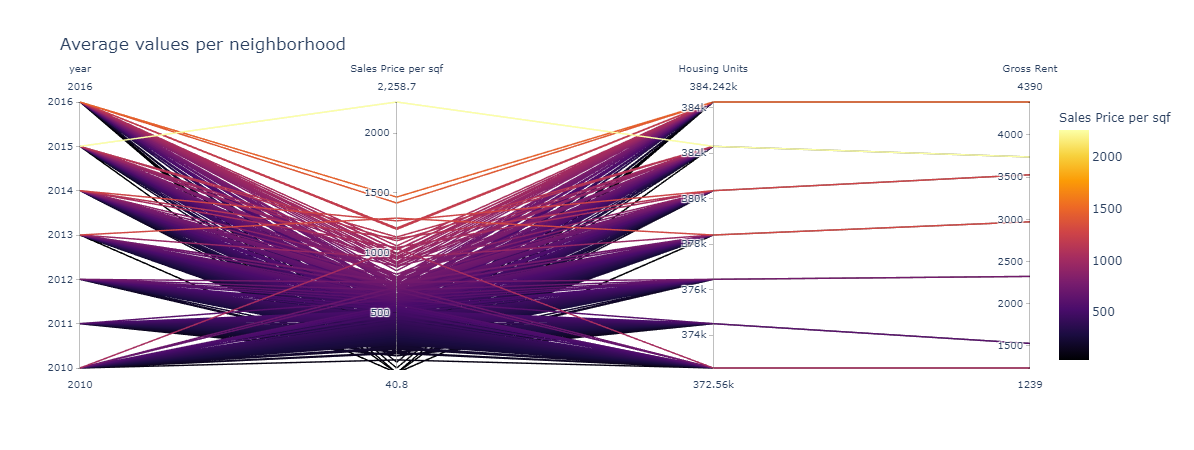

In [84]:
# Parallel Coordinates Plot

px.parallel_coordinates(
    top_10_most_expensive, 
    title='Average values per neighborhood',
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross Rent'},
    color='sale_price_sqr_foot', 
    color_continuous_scale=px.colors.sequential.Inferno,

)


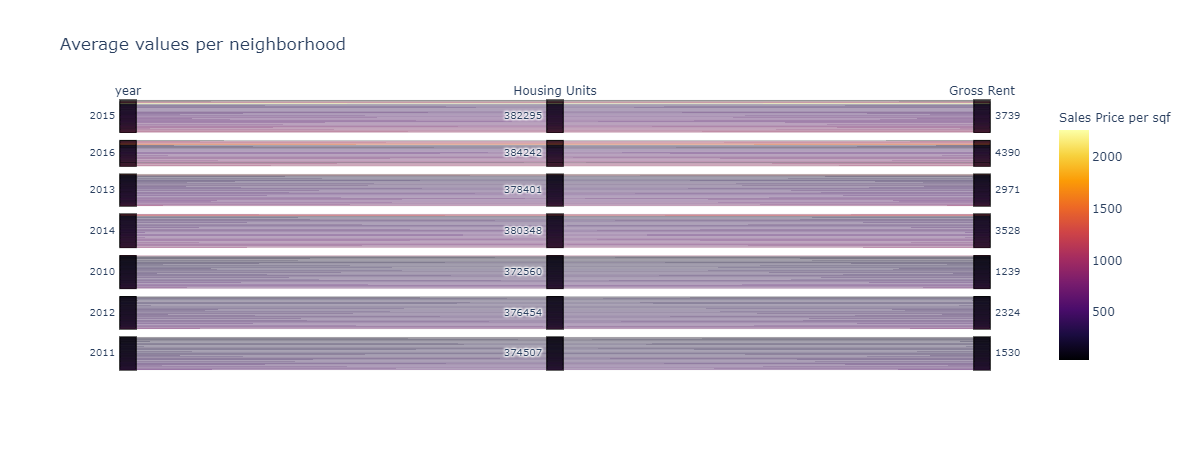

In [85]:
# Parallel Categories Plot
px.parallel_categories(
    top_10_most_expensive,    
    title='Average values per neighborhood',
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross Rent'},
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [86]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [87]:
# Calculate the mean values for each neighborhood

sfo_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
sfo_neighborhoods = sfo_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False).reset_index()
sfo_neighborhoods.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000


In [88]:
# Join the average values with the neighborhood locations

sfo_all_neighborhoods=pd.concat([df_neighborhood_locations,
                                sfo_neighborhoods['sale_price_sqr_foot'],
                                sfo_neighborhoods['housing_units'],
                                sfo_neighborhoods['gross_rent']
                               ], axis=1).dropna()
sfo_all_neighborhoods.head()


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,903.993258,377427.50,2555.166667
1,Anza Vista,37.779598,-122.443451,788.844818,380348.00,3414.000000
2,Bayview,37.734670,-122.401060,779.810842,375967.25,2155.250000
3,Bayview Heights,37.728740,-122.410980,689.555817,378401.00,2817.285714
4,Bernal Heights,37.728630,-122.443050,687.087575,382295.00,3959.000000


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

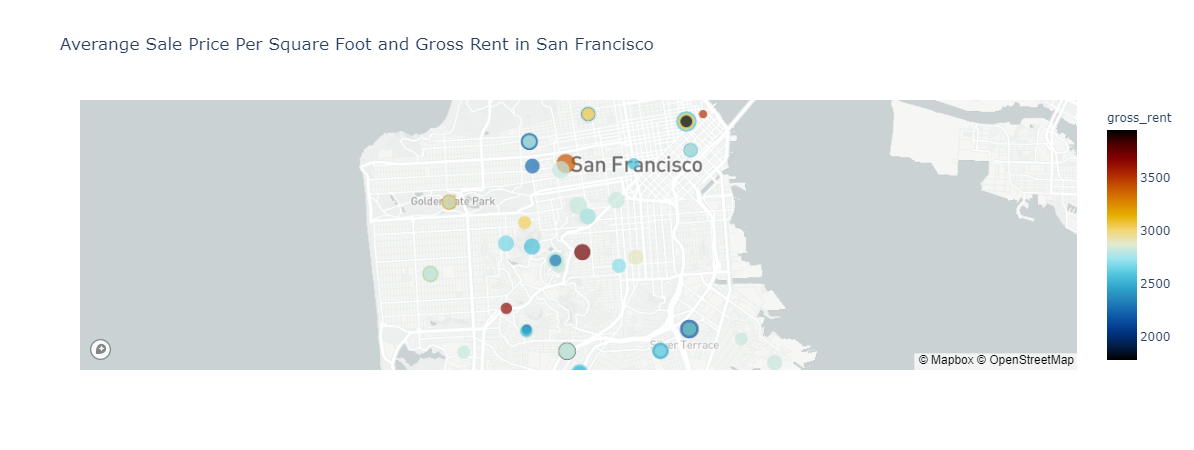

In [89]:
# Create a scatter mapbox to analyze neighborhood info

px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    sfo_all_neighborhoods,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)
map.show()